##  Optimization manual steps

In [1]:
import random
import numpy as np
import pprint

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import MLP
from mycrograd_debug.drawviz_debug import draw_dot, draw_nn, print_all_values

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### Multi Layer Perceptron 1-2-1

In [2]:
# loss function single MLP
def loss_single(target, output):
    total_loss = (output - target)*(output - target)
    total_loss.type="l"
    return total_loss

In [3]:
# initialize a model
nin = 1  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(nin, [2, nout], weightsinit=2, lastReLU=False, debug_bw=True)
xinumbers = list(range(4, 4 + nin))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs= ", xinput[0].data)
print("parameters")
pp.pprint(model.parameters())

xtarget = Value(1.2, type="t")  # desired targets

Module nn MLP: structure [1, 2, 1]
inputs=  4
parameters
[   Value(name=v001,layernumber=L1,neuronnumber=N1,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v002,layernumber=L1,neuronnumber=N1,weightnumber=,type=b,data=0, grad=0),
    Value(name=v003,layernumber=L1,neuronnumber=N2,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v004,layernumber=L1,neuronnumber=N2,weightnumber=,type=b,data=0, grad=0),
    Value(name=v005,layernumber=L2,neuronnumber=N1,weightnumber=,type=w1,data=0.6000000000000001, grad=0),
    Value(name=v006,layernumber=L2,neuronnumber=N1,weightnumber=,type=w2,data=1.2000000000000002, grad=0),
    Value(name=v007,layernumber=L2,neuronnumber=N1,weightnumber=,type=b,data=0, grad=0)]


In [4]:
# loss=10
activation = model(xinput)

def act():
    #### forward pass0
    activation = model(xinput)
    loss = loss_single(activation, xtarget)
    print("loss= ", loss.data)
    return loss

def zeroGradients():
    # for p in model.parameters():
    #     p.grad = 0.0
    model.zero_grad()
    print("zero'd gradients")
    pp.pprint(model.parameters())

def back():
    #### backward pass
    # loss.backward()
    activation.backward()
    print("parameters after backpass")
    pp.pprint(model.parameters())

def upd():
    #### update
    for p in model.parameters():
        p.data += -0.1 * p.grad
    print("updated parameters")
    pp.pprint(model.parameters())

loss=  5.760000000000002
name ty   data   grad
v001 w1   0.50   0.00
v002  b   0.00   0.00
v003 w1   0.50   0.00
v004  b   0.00   0.00
v005 w1   0.60   0.00
v006 w2   1.20   0.00
v007  b   0.00   0.00
v008  i   4.00   0.00
v010      2.00   0.00
v011  a   2.00   0.00
v012      2.00   0.00
v013  a   2.00   0.00
v014      1.20   0.00
v015      1.20   0.00
v016      2.40   0.00
v017  a   3.60   0.00


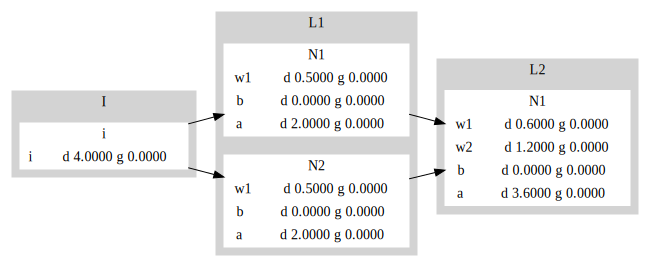

In [5]:
act()
print_all_values(activation)
dot=draw_nn(xinput, model)
dot

In [6]:
# pp.pprint(model.parameters())
# activation = model(xinput)
# loss = loss_single(activation, xtarget)
# print("loss= ", loss.data)
# draw_dot(loss)

In [7]:
# # Optimization Step
# def opt_step():
#     #### forward pass0
#     activation = model(xinput)
#     loss = loss_single(activation, xtarget)
#     print("loss= ", loss.data)

#     #### backward pass
#     # for p in model.parameters():
#     #     p.grad = 0.0
#     model.zero_grad()
#     loss.backward()

#     draw_dot(loss, debug_print_01=False)

#     #### update
#     for p in model.parameters():
#         # p.data += -0.1 * p.grad
#         p.data -= 0.1 * p.grad

#     print("updated parameters")
#     pp.pprint(model.parameters())

#     return loss

In [8]:
# # Optimization Step
# def opt_step():
#     loss=act()
#     zeroGradients()
#     back()
#     upd()
#     return loss

In [9]:
# opt_step()